<a href="https://colab.research.google.com/github/OcSpice/Sentiment-Dataset-EDA/blob/main/Churn_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Simple Linear Regression

## **Level 2 Task 1 – Simple Linear Regression**

This project is part of my **Data Analysis Internship at Codveda Technologies**.  

The objective is to perform a **Simple Linear Regression** analysis on the **Churn Dataset** using:  
- **Churn A (80%)** → for building the model.  
- **Churn B (20%)** → for evaluating the model.  

I aim to predict **Total Day Charge** (dependent variable) from **Total Day Minutes** (independent variable).  

This task follows a supervised learning workflow using the provided split:  
- **Churn A (80%)** → used to build and train the regression model.  
- **Churn B (20%)** → used to evaluate model performance.  
- **Model fitting** → fitting a linear regression line between minutes and charges.  
- **Evaluation** → measuring accuracy with R² and MSE.  
- **Visualization & Interpretation** → scatter plot with regression line and residual analysis.

### **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Step 2: Load Datasets**

In [ ]:

# Load the two files
churn_a = pd.read_csv("/content/Level 2/churn-bigml-80.csv")  # Part A
churn_b = pd.read_csv("/content/Level 2/churn-bigml-20.csv")  # Part B

print("Churn A shape:", churn_a.shape)
print("Churn B shape:", churn_b.shape)

Churn A shape: (2666, 20)
Churn B shape: (667, 20)


### **Step 3: Select Variables**

In [ ]:
# Predictor (X) and Target (y)
X_a = churn_a[['Total day minutes']]
y_a = churn_a['Total day charge']

X_b = churn_b[['Total day minutes']]
y_b = churn_b['Total day charge']

### **Step 4: Fit Model**

In [ ]:
model = LinearRegression()
model.fit(X_a, y_a)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 0.0006185218362944056
Coefficient: 0.16999950056381521


### **Step 5: Make Predictions**

In [ ]:
y_pred = model.predict(X_b)

### **Step 6: Evaluate Model**

In [ ]:
r2 = r2_score(y_b, y_pred)
mse = mean_squared_error(y_b, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.9999999073207673
Mean Squared Error: 8.240420038734008e-06


### **Step 7: Visualization - Regression Line**

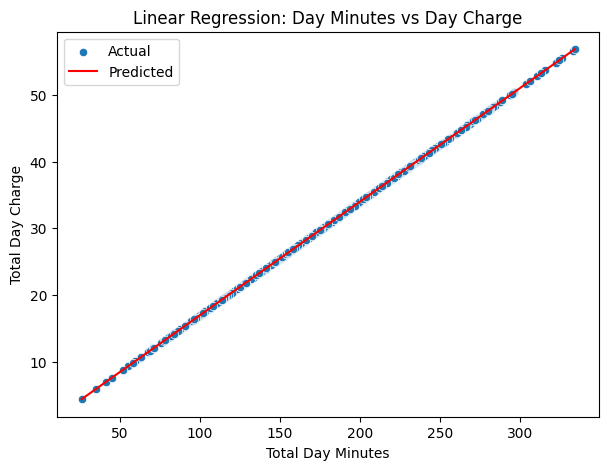

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_b['Total day minutes'], y=y_b, label="Actual")
sns.lineplot(x=X_b['Total day minutes'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.title("Linear Regression: Day Minutes vs Day Charge")
plt.legend()
plt.show()

### **Step 8: Visualization - Residual Plot**

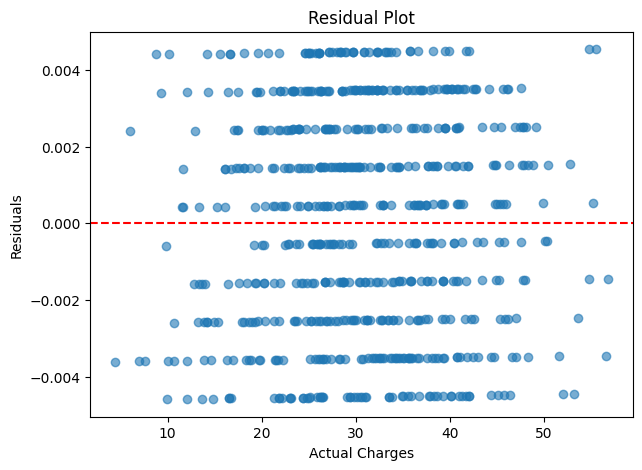

In [ ]:
residuals = y_b - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_b, residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### **Step 9: Conclusion, Interpretation & Business Implications**

The regression analysis confirmed a **near-perfect linear relationship** between **Total Day Minutes** and **Total Day Charge**.  

- The slope (~0.17) aligns with the expected per-minute billing rate.  
- The intercept (~0.0006) is negligible, showing no hidden fixed charge.  
- The R² score (≈1.0) and extremely low MSE indicate the model captures the relationship almost perfectly.  
- The residual plot shows random scatter around zero, meaning there is no systematic error or bias in the predictions.  



✅ **Key Insight:**  
Telecom billing in this dataset is directly proportional to call duration, validating the correctness of the charging system. Linear regression not only modeled this accurately but also reinforced the underlying business rule.  

💼 **Business Implications:**  
- For **telecom operators**, this analysis builds trust in their billing transparency and can be used in **regulatory compliance reporting**.  
- For **investment analysts** (like in banking/finance roles), the strong linearity reduces revenue forecasting risk—future charges can be reliably estimated from call volume data.  
- For **customer strategy teams**, this confirms that pricing models are predictable, making it easier to test promotional offers or simulate the financial impact of new tariffs.